# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [4]:
df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [5]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [6]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [8]:
df_train.shape

(15223, 52)

In [7]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [9]:
df_test.shape

(14910, 52)

In [10]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [11]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [12]:
df = df_test.append(df_train).reset_index(drop=True)

In [13]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [15]:
for column_name in df_train.columns: # перебираем все столбцы
    if str(df_train[column_name].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(column_name) # выводим название столбца
        print(set(df_train[column_name])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Неоконченное высшее', 'Высшее', 'Два и более высших образования', 'Неполное среднее', 'Среднее специальное', 'Ученая степень', 'Среднее'}


MARITAL_STATUS
{'Вдовец/Вдова', 'Гражданский брак', 'Состою в браке', 'Разведен(а)', 'Не состоял в браке'}


GEN_INDUSTRY
{nan, 'Страхование', 'Управляющая компания', 'Строительство', 'Недвижимость', 'Образование', 'Наука', 'Сборочные производства', 'Металлургия/Промышленность/Машиностроение', 'ЧОП/Детективная д-ть', 'Другие сферы', 'Банк/Финансы', 'СМИ/Реклама/PR-агенства', 'Развлечения/Искусство', 'Торговля', 'Транспорт', 'Государственная служба', 'Энергетика', 'Информационные услуги', 'Химия/Парфюмерия/Фармацевтика', 'Ресторанный бизнес/Общественное питание', 'Логистика', 'Подбор персонала', 'Информационные технологии', 'Маркетинг', 'Здравоохранение', 'Коммунальное хоз-во/Дорожные службы', 'Салоны красоты и здоровья', 'Юридические услуги/нотариальные услуги', 'Сельское хозяйство', 'Туризм', 'Нефтегазовая промышленность'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [16]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [23]:
# Пропуски в данных имеются, т.к. максимальное количество строк в массиве 30133, однако некоторые поля имеют количественно меньше значений. Например поле PREVIOUS_CARD_NUM_UTILIZED имеет всего 600.
# В PREVIOUS_CARD_NUM_UTILIZED заполню их нулями. В WORK_TIME средними значениями.

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [24]:
# Категориальные признаки так же имеются. Например поля FAMILY_INCOME, MARITAL_STATUS и EDUCATION. Можно использовать подходит OneHotEncoding для перевода значений в столбцы, однако, для полей с большим количеством категориальных признаков следует придумать решение.

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [30]:
def preproc_data(df_input):
    df_output = df_input.copy()

    
    # удаляем идентификатор AGREEMENT_RK
    columns_name_to_delete = ['AGREEMENT_RK', 'REG_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE']
    for column in columns_name_to_delete:
        df_output = df_output.drop(columns=column)
    
    
    # заменяем запятые на точки и переводим во float
    column_name_replace = ['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT']
    for column in column_name_replace:
        df_output[column] = df_output[column].map(lambda x: x.replace(',', '.')).astype('float')
    
    
    # оставляем только те строки, которые имеют значения в указанных полях
    column_name_dropna = ['GEN_INDUSTRY','GEN_TITLE','ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'REGION_NM']
    for column in column_name_dropna:
        df_output[column] = df_output[column].dropna(inplace=True)
    
    
    # заполняем все пропуски на средние значения
    df_output[['WORK_TIME']] = df_output[['WORK_TIME']].fillna(df.mean())
    
    
    # заполняем все пропуски на нули
    df_output[['PREVIOUS_CARD_NUM_UTILIZED']] = df_output[['PREVIOUS_CARD_NUM_UTILIZED']].fillna(0)
    
    
    # применяем oneHotEncoding для текстовых признаков и удаляем соответствующие столбцы
    for column_name in df_output.columns: # перебираем все столбцы
        if str(df_output[column_name].dtype) == 'object':
            df_output = pd.concat([df_output, pd.get_dummies(df_output[column_name], prefix=column_name, prefix_sep='_')], axis=1)
            df_output.drop(columns=column_name, axis = 1, inplace = True)
    
    return df_output

In [31]:
df_preproc = df.pipe(preproc_data)

In [32]:
df_preproc.shape

(30133, 140)

In [33]:
# Проверяем наличие пустых значений в обработанном датафрейме
df_preproc.isnull().values.any()

False

In [34]:
# Смотрим размерности целевой переменной в изначальном датафрейме
df[(df["TARGET"] == 1) & (df["sample"]=="train")].shape

(1812, 53)

In [35]:
# Смотрим размерности целевой переменной в обработанном датафрейме
df_preproc[(df_preproc["TARGET"] == 1) & (df_preproc["sample_train"]==1)].shape #target- целевой показатель в обработанном датафрейме

(1812, 140)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [43]:
from sklearn.model_selection import train_test_split

# целевая переменная
y = df_preproc['TARGET']
print(sum(y))
y.shape

3562


(30133,)

In [42]:
df_preproc_train = df_preproc.drop(["sample_train", "sample_test","TARGET"], axis=1)
df_preproc_train.shape

(30133, 137)

In [44]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42

X_train, X_test, y_train, y_test = train_test_split(df_preproc_train, y, test_size=0.3, random_state = 42)

C:\Users\roman\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [45]:
y_test.shape

(9040,)

In [46]:
X_test.shape

(9040, 137)

#### Задание 5. Обучение и оценка качества разных моделей

In [47]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21093 entries, 16948 to 23654
Columns: 137 entries, AGE to FACT_ADDRESS_PROVINCE_Ярославская область
dtypes: float64(7), int64(30), uint8(100)
memory usage: 8.1 MB


In [59]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# инициализируем модель
model = LogisticRegression()

# обучаем модель
model.fit(X_train, y_train)
predict_lr = model.predict(X_test)  
predict_proba_lr = model.predict_proba(X_test)[:,1]
predict_proba_lr

C:\Users\roman\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:340: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


array([0.19244777, 0.15095562, 0.14931661, ..., 0.06847402, 0.14926707,
       0.28245783])

In [71]:
# инициализируем модель
model = RandomForestClassifier()

# обучаем модель
model.fit(X_train, y_train)
predict_rfc = model.predict(X_test)  
predict_proba_rfc = model.predict_proba(X_test)[:,1]
predict_proba_rfc

array([0. , 0.4, 0.3, ..., 0.1, 0.2, 0.2])

In [53]:
# инициализируем модель
model = DecisionTreeClassifier()

# обучаем модель
model.fit(X_train, y_train)
predict_dtc = model.predict(X_test)  
predict_proba_dtc = model.predict_proba(X_test)[:,1]
predict_proba_dtc

array([0., 0., 1., ..., 0., 1., 0.])

In [65]:
# инициализируем модель
model = LogisticRegression()

# обучаем модель
model.fit(df_preproc, y)
predict_init_df = model.predict(df_preproc) 

In [61]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

# Сохраняем метрики в переменные
precision_score_LR = precision_score(y_test, predict_lr)
recall_score_LR = recall_score(y_test, predict_lr)
accuracy_score_LR = accuracy_score(y_test, predict_lr)

# Выводим метрики
print('precision', precision_score(y_test, predict_lr))
print('recall', recall_score(y_test, predict_lr))
print('accuracy', accuracy_score(y_test, predict_lr))

precision 0.1111111111111111
recall 0.0009182736455463728
accuracy 0.8787610619469026


In [72]:
# Сохраняем метрики в переменные
precision_score_RFC = precision_score(y_test, predict_rfc)
recall_score_RFC = recall_score(y_test, predict_rfc)
accuracy_score_RFC = accuracy_score(y_test, predict_rfc)


# Выводим метрики
print('precision', precision_score(y_test, predict_rfc))
print('recall', recall_score(y_test, predict_rfc))
print('accuracy', accuracy_score(y_test, predict_rfc))

precision 0.21739130434782608
recall 0.009182736455463728
accuracy 0.8766592920353983


In [63]:
# Сохраняем метрики в переменные
precision_score_DTC = precision_score(y_test, predict_dtc)
recall_score_DTC = recall_score(y_test, predict_dtc)
accuracy_score_DTC = accuracy_score(y_test, predict_dtc)


# Выводим метрики
print('precision', precision_score(y_test, predict_dtc))
print('recall', recall_score(y_test, predict_dtc))
print('accuracy', accuracy_score(y_test, predict_dtc))

precision 0.16096207215541167
recall 0.15977961432506887
accuracy 0.7984513274336283


In [67]:
# Сохраняем метрики в переменные
precision_score_INIT_DF = precision_score(y, predict_init_df)
recall_score_INIT_DF = recall_score(y, predict_init_df)
accuracy_score_INIT_DF = accuracy_score(y, predict_init_df)


# Выводим метрики
print('precision', precision_score(y, predict_init_df))
print('recall', recall_score(y, predict_init_df))
print('accuracy', accuracy_score(y, predict_init_df))

precision 0.75
recall 0.0016844469399213925
accuracy 0.8819234726047854


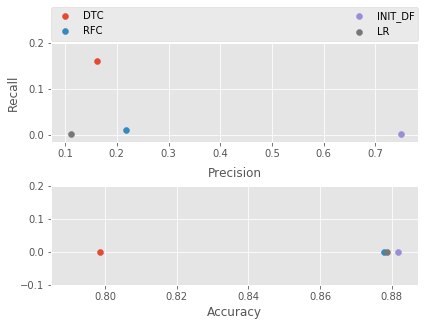

In [73]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

## Your Code Here
%matplotlib inline
from matplotlib import pyplot as plt


plt.subplot(2, 1, 1)

DTC = plt.scatter(precision_score_DTC, recall_score_DTC, label = "DTC")
RFC = plt.scatter(precision_score_RFC, recall_score_RFC, label = "RFC")
INIT_DF = plt.scatter(precision_score_INIT_DF, recall_score_INIT_DF, label = "INIT_DF")
LR = plt.scatter(precision_score_LR, recall_score_LR, label = "LR")

plt.ylabel('Recall', labelpad = 8)
plt.xlabel('Precision', labelpad = 8)

# Create a legend for the first line
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

plt.subplot(2, 1, 2)
plt.scatter(accuracy_score_DTC, 0, label = "DTC")
plt.scatter(accuracy_score_RF, 0, label = "RFC")

plt.scatter(accuracy_score_INIT_DF, 0, label = "INIT_DF")
plt.scatter(accuracy_score_LR, 0, label = "LR")

plt.ylim((-0.1, 0.2))
plt.xlabel('Accuracy')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45,
                    wspace=0.35)

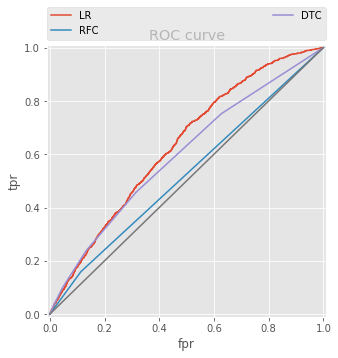

In [74]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии


%matplotlib inline
from sklearn.metrics import roc_auc_score, roc_curve

fpr_lr, tpr_lr, thresholds = roc_curve(y_test, predict_proba_lr)
fpr_dtc, tpr_dtc, thresholds = roc_curve(y_test, predict_proba_dtc)
fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test, predict_proba_rfc)

plt.figure(figsize=(5, 5))

plt.plot(fpr_lr, tpr_lr, label = "LR")
plt.plot(fpr_dtc, tpr_dtc, label = "RFC")
plt.plot(fpr_rfc, tpr_rfc, label = "DTC")

plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)

plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

In [75]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

from sklearn.model_selection import cross_val_score
rfc = RandomForestClassifier()
cross_val_score(
    rfc,
    df_preproc_train,
    y,
    scoring='roc_auc',
    cv=10
).mean()

0.6057514772641314

In [76]:
from sklearn.model_selection import cross_val_score
dtc = DecisionTreeClassifier()
cross_val_score (
    dtc,
    df_preproc_train,
    y,
    scoring='roc_auc',
    cv=10
).mean()

0.5280287093302595

In [77]:
from sklearn.model_selection import cross_val_score
lr = LogisticRegression()
cross_val_score (
    lr,
    df_preproc_train,
    y,
    scoring='roc_auc',
    cv=10
).mean()

0.6247033324441827

In [78]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки

# Выделяем тестовую выборку
test = df_preproc[(df_preproc["sample_test"] == 1)]
target = test["TARGET"]
df_test = test.drop(["sample_train", "sample_test","TARGET"], axis = 1) 
df_test.shape

(14910, 137)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(df_test, target, test_size=0.3, random_state=42)

# Инициализируем модель
model = LogisticRegression()

# Обучаем модель
model.fit(X_train, y_train)
predict_test = model.predict(X_test)
predict_proba_test = model.predict_proba(X_test)[:,1]

sorted(predict_proba_test)

[4.88555386863603e-174,
 2.3736317997548905e-16,
 0.0006710259072700381,
 0.0007465374305667665,
 0.0017238646624332234,
 0.0017478471622880956,
 0.0018789230523894957,
 0.0032737158101486994,
 0.0035146418335054094,
 0.004802730477378195,
 0.006001219058363566,
 0.006572485968622734,
 0.008104380910581882,
 0.00813398272344993,
 0.00865671191316267,
 0.0087781094219,
 0.008935918606100884,
 0.008975187420392352,
 0.009226981202505664,
 0.00929246682414903,
 0.009619781430220499,
 0.00982663200184992,
 0.010064525847926843,
 0.010319176166871532,
 0.010959675080534971,
 0.011195832189948195,
 0.011490876722721867,
 0.011821015825910988,
 0.011847829046808952,
 0.012243418691946855,
 0.012760620343102587,
 0.013063414899913394,
 0.013539050587227878,
 0.013599291235947405,
 0.0136846549302666,
 0.013970450952382507,
 0.013986296870642257,
 0.014004356946646975,
 0.01409696083007414,
 0.014390977951752778,
 0.014664237964750193,
 0.01544880278703285,
 0.015543092395026522,
 0.01567226098

ROC AUC = 0.6135775066441613


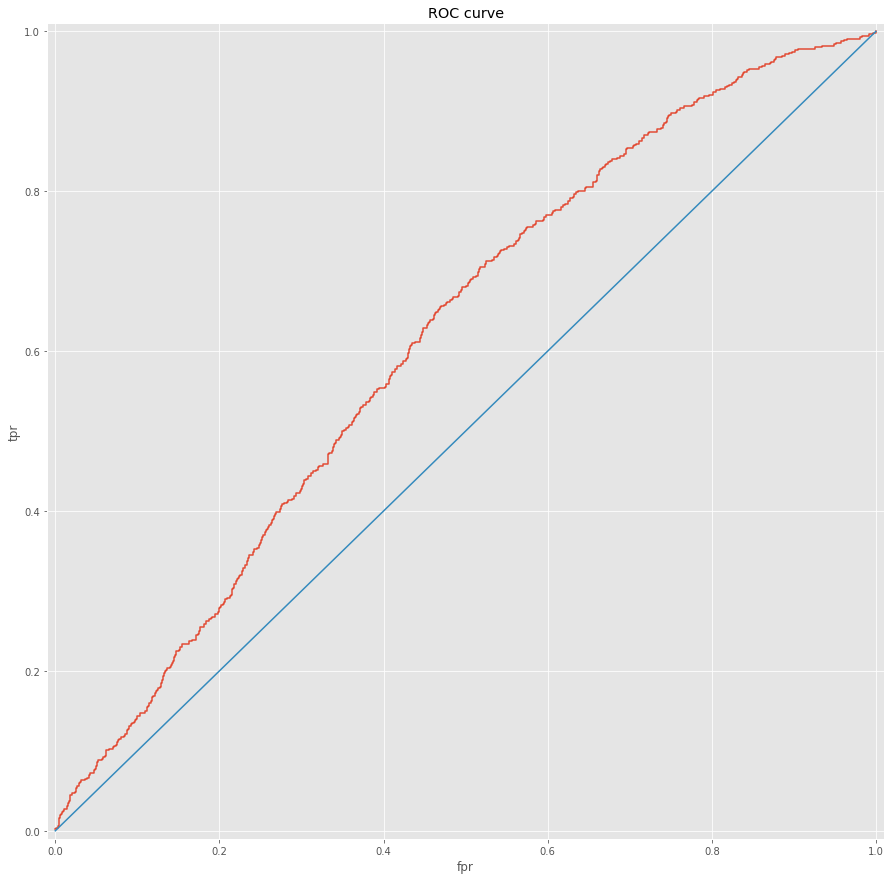

In [83]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

fpr_test, tpr_test, thresholds = roc_curve(y_test, predict_proba_test)
roc_auc = roc_auc_score(y_test, predict_proba_test)

# Настройки графика
plt.figure(figsize=(15, 15))
plt.plot(fpr_test, tpr_test, label = "LR")
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

print ("ROC AUC = "+ str(roc_auc))

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [ ]:
### И далее ;)